In [ ]:
# Install required libraries if not already installed
# !pip install yfinance bs4 lxml pandas matplotlib


In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


In [2]:
def make_graph(stock_data, revenue_data, stock, revenue, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color=color)
    ax1.plot(stock_data.Date, stock_data.Close, color=color, label='Stock Price')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Revenue', color=color)
    ax2.plot(revenue_data.Date, revenue_data.Revenue, color=color, label='Revenue')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title(title)
    plt.show()


In [3]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [15]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text

soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
print("Number of tables found for Tesla:", len(tables))

if len(tables) >= 2:
    target_table = tables[1]
elif len(tables) == 1:
    target_table = tables[0]
else:
    raise Exception("No tables found on Tesla revenue page.")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in target_table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != '':
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([{"Date": date, "Revenue": revenue}])], ignore_index=True)

tesla_revenue.tail()


Number of tables found for Tesla: 6


,Date,Revenue
58,2010-09-30,31
59,2010-06-30,28
60,2010-03-31,21
61,2009-09-30,46
62,2009-06-30,27


In [6]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


In [16]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
target_table = tables[1] if len(tables) >= 2 else tables[0]

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in target_table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != '':
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame([{"Date": date, "Revenue": revenue}])], ignore_index=True)

gme_revenue.tail()


,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


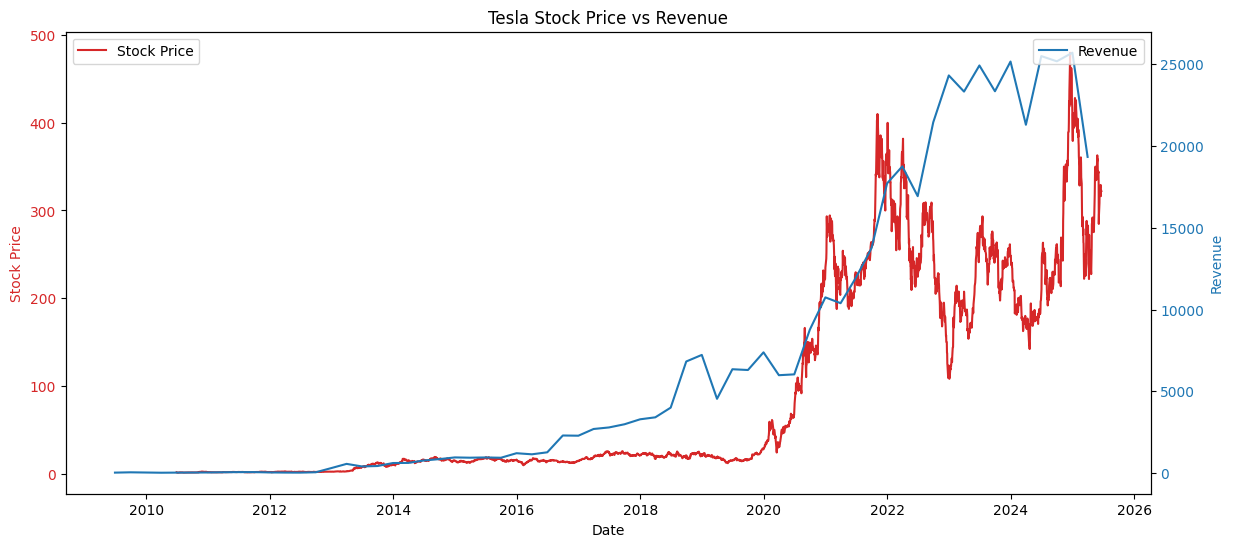

In [ ]:
# Ensure 'Date' columns are in datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Ensure 'Revenue' is numeric
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Now plot safely
make_graph(tesla_data, tesla_revenue, tesla_data.Close, tesla_revenue.Revenue, 'Tesla Stock Price vs Revenue')


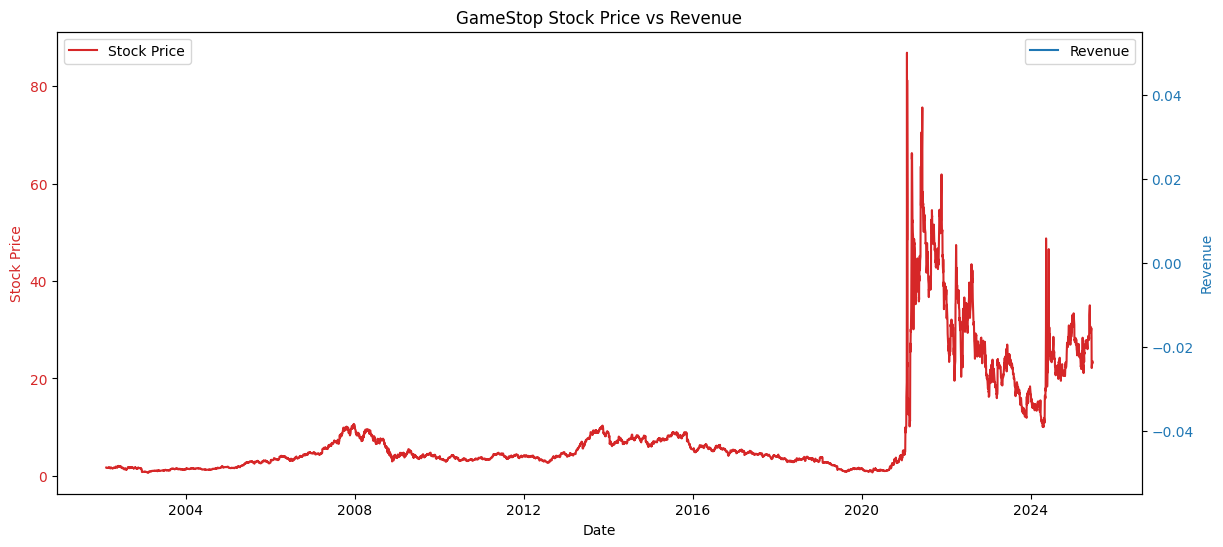

In [14]:
make_graph(gme_data, gme_revenue, gme_data.Close, gme_revenue.Revenue, 'GameStop Stock Price vs Revenue')
